# Stage 3: Wordcloud Generation
- Wordcloud will be reused later on

### Importing Libraries

In [1]:
# Importing necessary libraries
import pickle
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_pickle('data_clean.pkl')

### Advance Data Cleaning
- Tokenization
- Lemmatization

In [3]:
# Further Cleaning of dataset, tokenizing and lemmatizing

#Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+')
#Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

#Third round, tokenizing, removing stopwords and lemmatizing.
def clean_text_round2(text):
    token = tokenizer.tokenize(text.lower())
    words = [w for w in token if w not in stopwords.words('english')]
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in words])
    return lem_text

round2 = lambda x: clean_text_round2(x)


In [4]:
# Applying cleaning to dataset

# Product an cleaned dataset named lem_dfD
lem_df = pd.DataFrame(df.text.apply(round2))

# Reinsert the essential columns, rating and title

lem_df['rating'] = df.rating
lem_df['title'] = df.title

lem_df

,text,rating,title
0,boyfriend bought house first thought unpackagi...,1,"Great Echo integration, terrible microwave."
1,although alexa integration seemed little gimmi...,5,Very functional microwave at a great price
2,good small microwave someone apartment,5,Good Small Microwave
3,microwave used kitchen appliance next refriger...,4,Is a voice control microwave worth it?
4,microwave powerful heat food evenly low qualit...,1,Uneven heat
...,...,...,...
4995,alexa stopped working microwave week pressing ...,1,My Beloved Microwave
4996,received christmas gift absolutely love love c...,5,It’s great
4997,awful worst microwave,1,Had to replace this microwave right away
4998,plastic coming key pad use alexa much,3,Not practical for me


In [5]:
rated_df = pd.DataFrame(lem_df.groupby('rating')['text'].apply(lambda x: "%s" % '. .'.join(x)))
rated_df.reset_index(inplace=True)

rated_df


,rating,text
0,1,boyfriend bought house first thought unpackagi...
1,2,ok preordered could wait come disappointed imm...
2,3,told people wonder press button well dad legal...
3,4,microwave used kitchen appliance next refriger...
4,5,although alexa integration seemed little gimmi...


### Word extraction

In [6]:
# Converting it to Document-Term Matrix 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(rated_df.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = rated_df.index
data_dtm

# Transpose the data for wordcloud generation
wc_data = data_dtm.transpose()

wc_data

,0,1,2,3,4
00,11,9,0,0,11
000,3,0,0,2,5
0000,0,0,0,2,0
000w,0,0,0,2,0
01,1,0,0,0,0
...,...,...,...,...,...
zero,6,1,1,1,4
zi,1,0,0,0,0
zillion,1,0,0,0,0
zone,2,1,1,0,1


In [7]:
# Find the top 30 words said in each rating
top_dict = {}
for c in wc_data.columns:
    top = wc_data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('microwave', 1794),
  ('alexa', 510),
  ('year', 486),
  ('month', 432),
  ('use', 401),
  ('time', 388),
  ('amazon', 354),
  ('started', 306),
  ('inside', 302),
  ('product', 275),
  ('heat', 264),
  ('small', 256),
  ('like', 246),
  ('food', 242),
  ('work', 234),
  ('minute', 222),
  ('buy', 205),
  ('bought', 195),
  ('thing', 187),
  ('popcorn', 185),
  ('worked', 158),
  ('caught', 157),
  ('used', 156),
  ('spark', 155),
  ('sparking', 137),
  ('working', 135),
  ('plate', 129),
  ('return', 128),
  ('great', 126),
  ('good', 125)],
 1: [('microwave', 516),
  ('alexa', 212),
  ('use', 138),
  ('time', 136),
  ('small', 130),
  ('year', 122),
  ('heat', 110),
  ('work', 104),
  ('month', 93),
  ('food', 82),
  ('inside', 79),
  ('like', 69),
  ('thing', 68),
  ('started', 66),
  ('amazon', 66),
  ('popcorn', 65),
  ('minute', 65),
  ('great', 60),
  ('power', 58),
  ('plate', 57),
  ('size', 53),
  ('bag', 52),
  ('longer', 49),
  ('good', 48),
  ('cook', 48),
  ('button

In [8]:
# Print the top 15 words said in each ratings
for category, top_words in top_dict.items():
    print(category)
    print(', '.join([word for word, count in top_words[0:15]]))
    print('---')

0
microwave, alexa, year, month, use, time, amazon, started, inside, product, heat, small, like, food, work
---
1
microwave, alexa, use, time, small, year, heat, work, month, food, inside, like, thing, started, amazon
---
2
microwave, alexa, time, work, small, use, like, heat, thing, plate, food, good, minute, need, great
---
3
microwave, alexa, work, small, use, time, like, great, good, need, thing, button, echo, little, fit
---
4
microwave, alexa, great, work, small, use, love, easy, like, time, perfect, set, size, space, little
---


In [9]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 15 words from each rating
words = []
for category in wc_data.columns:
    top = [word for (word, count) in top_dict[category]]
    for t in top:
        words.append(t)
        
words

['microwave',
 'alexa',
 'year',
 'month',
 'use',
 'time',
 'amazon',
 'started',
 'inside',
 'product',
 'heat',
 'small',
 'like',
 'food',
 'work',
 'minute',
 'buy',
 'bought',
 'thing',
 'popcorn',
 'worked',
 'caught',
 'used',
 'spark',
 'sparking',
 'working',
 'plate',
 'return',
 'great',
 'good',
 'microwave',
 'alexa',
 'use',
 'time',
 'small',
 'year',
 'heat',
 'work',
 'month',
 'food',
 'inside',
 'like',
 'thing',
 'started',
 'amazon',
 'popcorn',
 'minute',
 'great',
 'power',
 'plate',
 'size',
 'bag',
 'longer',
 'good',
 'cook',
 'button',
 'really',
 'bought',
 'worked',
 'product',
 'microwave',
 'alexa',
 'time',
 'work',
 'small',
 'use',
 'like',
 'heat',
 'thing',
 'plate',
 'food',
 'good',
 'minute',
 'need',
 'great',
 'cook',
 'popcorn',
 'inside',
 'button',
 'power',
 'echo',
 'size',
 'year',
 'really',
 'fit',
 'little',
 'set',
 'bought',
 'amazon',
 'door',
 'microwave',
 'alexa',
 'work',
 'small',
 'use',
 'time',
 'like',
 'great',
 'good',
 '

In [10]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('microwave', 5),
 ('alexa', 5),
 ('use', 5),
 ('time', 5),
 ('amazon', 5),
 ('heat', 5),
 ('small', 5),
 ('like', 5),
 ('food', 5),
 ('work', 5),
 ('thing', 5),
 ('great', 5),
 ('good', 5),
 ('minute', 4),
 ('plate', 4),
 ('size', 4),
 ('button', 4),
 ('really', 4),
 ('year', 3),
 ('inside', 3),
 ('product', 3),
 ('bought', 3),
 ('popcorn', 3),
 ('power', 3),
 ('cook', 3),
 ('need', 3),
 ('echo', 3),
 ('fit', 3),
 ('little', 3),
 ('set', 3),
 ('month', 2),
 ('started', 2),
 ('worked', 2),
 ('price', 2),
 ('feature', 2),
 ('easy', 2),
 ('love', 2),
 ('space', 2),
 ('buy', 1),
 ('caught', 1),
 ('used', 1),
 ('spark', 1),
 ('sparking', 1),
 ('working', 1),
 ('return', 1),
 ('bag', 1),
 ('longer', 1),
 ('door', 1),
 ('integration', 1),
 ('perfect', 1),
 ('kitchen', 1)]

In [11]:
from sklearn.feature_extraction import text 

add_stop_words = ['microwave']

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

### Wordcloud Generated from Ratings

In [12]:
# Let's make some word clouds!
from wordcloud import WordCloud
from PIL import Image
import numpy as np

mask = np.array(Image.open('AmazonMicrowave.jpg'))

wc = WordCloud(stopwords=stop_words, mask=mask, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

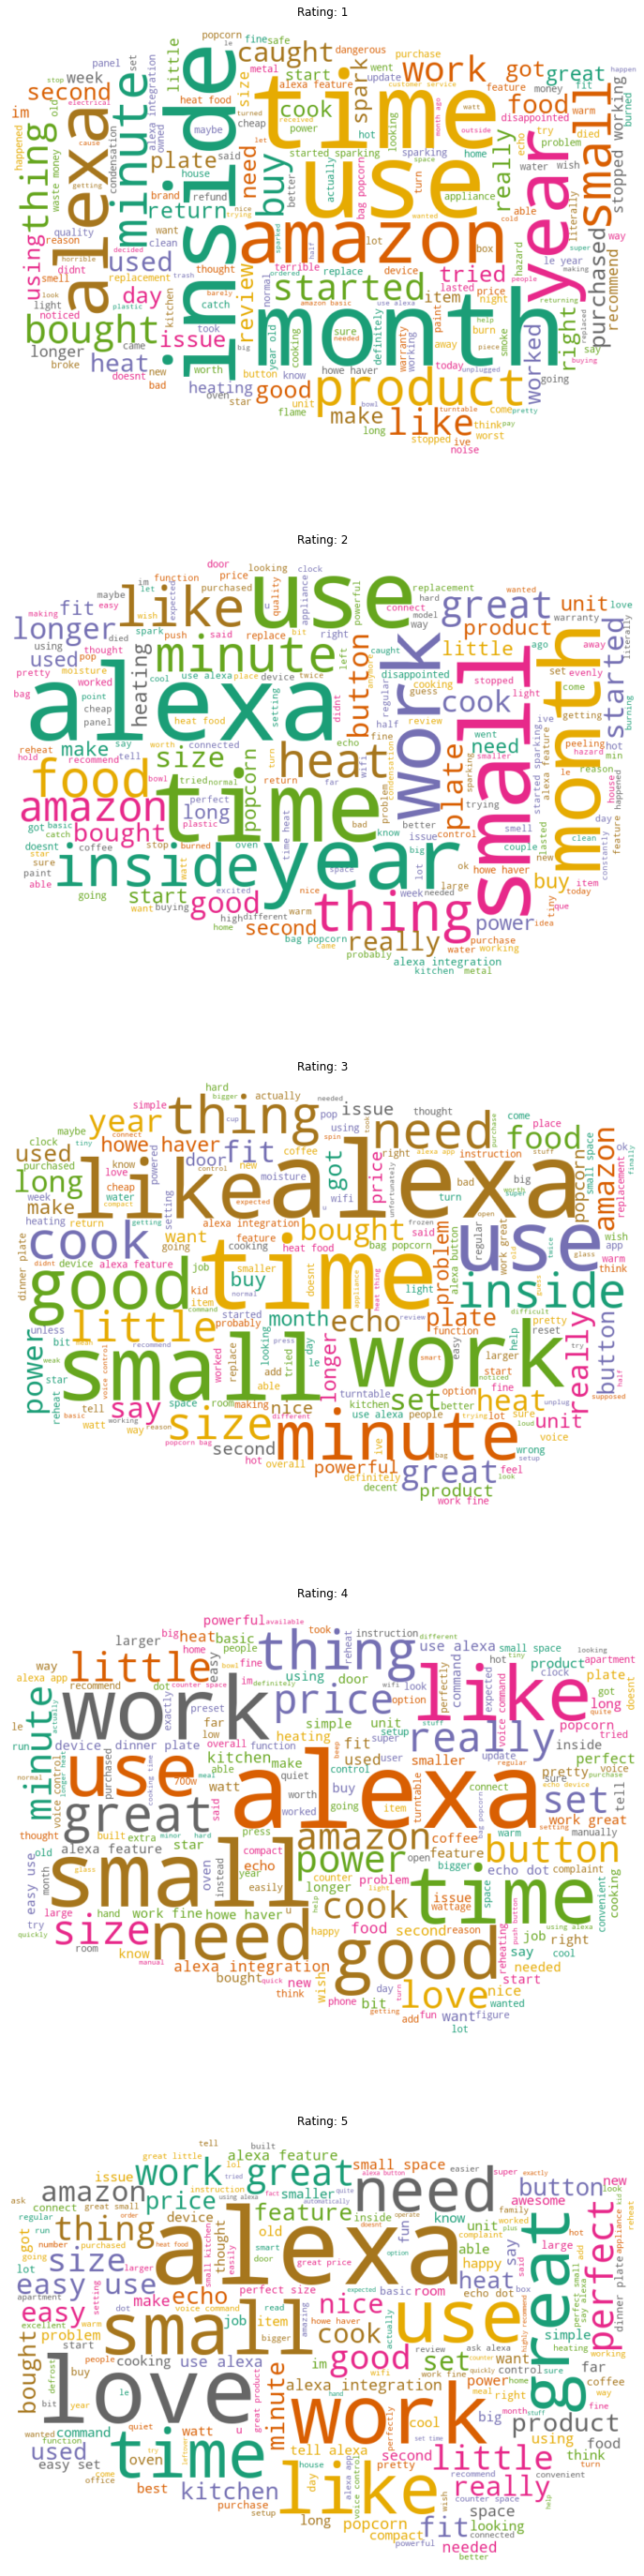

In [13]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [100, 50]

rate = ['Rating: 1', 'Rating: 2', 'Rating: 3', 'Rating: 4', 'Rating: 5']

# Create subplots for each comedian
for index, rating in enumerate(wc_data.columns):
    wc.generate(rated_df.text[rating])
    
    plt.subplot(len(rate), 1, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(rate[index])
    
plt.show()